In [1]:
import pandas as pd
import numpy as np

In [26]:
pd.set_option('display.max_columns',None)

In [2]:
games=pd.read_csv('datasets/games.csv',index_col=0)

In [3]:
games.columns= [col.replace(' ','_').lower() for col in games.columns ]

In [4]:
games=games.drop_duplicates()

In [5]:
games['release_date'].value_counts()

TBD             5462
Dec 31, 2023     236
Dec 31, 1993     140
Dec 31, 1995     135
Dec 31, 1983     133
                ... 
Mar 29, 1987       1
Nov 16, 1987       1
Feb 26, 2015       1
Jan 03, 1987       1
Apr 11, 2008       1
Name: release_date, Length: 8956, dtype: int64

In [6]:
games=games[games['release_date']!='TBD']
games=games.reset_index(drop=True)

In [7]:
games['release_date']=pd.to_datetime(games['release_date'])

In [8]:
games=games[~(games['release_date']>'2023-09-25')]
games=games.reset_index(drop=True)

In [9]:
games['plays']=games['plays'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
games['playing']=games['playing'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
games['backlogs']=games['backlogs'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
games['wishlist']=games['wishlist'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
games['lists']=games['lists'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)
games['reviews']=games['reviews'].replace({"K":"*1e3"}, regex=True).map(pd.eval).astype(int)

In [10]:
def clean_cols(i):
    i = i.replace('[','').replace(']','')
    i = i.replace("'",'')
    i = i.lower()
    i = i.split(', ')
    return i

In [11]:
games['platforms']=games['platforms'].apply(clean_cols)
games['genres']=games['genres'].apply(clean_cols)

- Dropping games with no ratings

In [12]:
games= games[games['rating'].isna()==False]
games=games.reset_index(drop=True)

In [13]:
games.shape

(19928, 13)

In [14]:
games['summary']=games['summary'].fillna('Not Available!')

In [15]:
games.isna().sum()

title           0
release_date    0
developers      0
summary         0
platforms       0
genres          0
rating          0
plays           0
playing         0
backlogs        0
wishlist        0
lists           0
reviews         0
dtype: int64

- Splitting categorical and numerical

In [19]:
categorical= games.select_dtypes(object)
numerical= games.select_dtypes(np.number)

In [20]:
categorical.head()

,title,developers,summary,platforms,genres
0,Elden Ring,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","[windows pc, playstation 4, xbox one, playstat...","[adventure, rpg]"
1,The Legend of Zelda: Breath of the Wild,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"[wii u, nintendo switch]","[adventure, puzzle]"
2,Hades,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"[windows pc, mac, playstation 4, xbox one, pla...","[adventure, brawler, indie, rpg]"
3,Hollow Knight,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"[windows pc, mac, linux, nintendo switch]","[adventure, indie, platform]"
4,Undertale,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","[windows pc, mac, linux, playstation 4, xbox o...","[adventure, indie, rpg, turn based strategy]"


In [21]:
numerical.head()

,rating,plays,playing,backlogs,wishlist,lists,reviews
0,4.5,21000,4100,5600,5500,4600,3000
1,4.4,35000,3100,5600,3000,5100,3000
2,4.3,25000,3500,7300,4000,3200,2100
3,4.4,25000,2700,9600,2600,3400,2100
4,4.2,32000,728,5700,2100,3900,2500


### Working on categorical data

- Need to split platforms and genres into their own columns

In [22]:
genres = games['genres'].str.join('|').str.get_dummies()
#genres.columns= 'genre_' + genres.columns
genres.columns= [col.replace(' ','_').lower() for col in genres.columns ]

In [27]:
genres

,adventure,arcade,brawler,card_&_board_game,fighting,indie,moba,music,pinball,platform,point-and-click,puzzle,quiz/trivia,racing,real_time_strategy,rpg,shooter,simulator,sport,strategy,tactical,turn_based_strategy,visual_novel
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19924,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19925,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
19926,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#genres.to_csv('datasets/genres.csv',index=False)

In [40]:
ge_cols=genres.columns
pickle.dump(ge_cols,open('datasets/ge_cols.pkl', 'wb'))

In [24]:
platforms= games['platforms'].str.join('|').str.get_dummies()
#platforms.columns= 'platform_' + platforms.columns
platforms.columns= [col.replace(' ','_').lower() for col in platforms.columns]

In [28]:
platforms

,1292_advanced_programmable_video_system,3do_interactive_multiplayer,acorn_archimedes,acorn_electron,amazon_fire_tv,amiga,amiga_cd32,amstrad_cpc,amstrad_pcw,android,apple_ii,apple_iigs,arcade,arduboy,atari_2600,atari_5200,atari_7800,atari_8-bit,atari_jaguar,atari_jaguar_cd,atari_lynx,atari_st/ste,ay-3-8606,bally_astrocade,bbc_microcomputer_system,blackberry_os,blu-ray_player,cdc_cyber_70,colecovision,commodore_16,commodore_c64/128,commodore_cdtv,commodore_pet,commodore_plus/4,commodore_vic-20,daydream,dragon_32/64,dreamcast,dvd_player,edsac,fairchild_channel_f,family_computer_(famicom),family_computer_disk_system,fm_towns,fm-7,gamate,game_&_watch,game_boy,game_boy_advance,game_boy_color,game.com,gear_vr,google_stadia,handheld_electronic_lcd,hp_2100,hyper_neo_geo_64,intellivision,intellivision_amico,ios,leapster,leapster_explorer/leadpad_explorer,legacy_computer,linux,mac,microcomputer,mobile,msx,msx2,n-gage,nec_pc-6000_series,neo_geo_aes,neo_geo_cd,neo_geo_mvs,neo_geo_pocket,neo_geo_pocket_color,nes,new_nintendo_3ds,nintendo_3ds,nintendo_64,nintendo_64dd,nintendo_ds,nintendo_dsi,nintendo_gamecube,nintendo_playstation,nintendo_switch,oculus_quest,oculus_quest_2,oculus_rift,oculus_vr,odyssey,onlive_game_system,ooparts,ouya,palm_os,pc_dos,pc_engine_supergrafx,pc-8801,pc-98,pc-fx,pdp-10,philips_cd-i,philips_videopac_g7000,playdate,playstation,playstation_2,playstation_3,playstation_4,playstation_5,playstation_network,playstation_portable,playstation_vita,playstation_vr,playstation_vr2,plug_&_play,pokémon_mini,satellaview,sega_32x,sega_cd,sega_game_gear,sega_master_system,sega_mega_drive/genesis,sega_saturn,sg-1000,sharp_mz-2200,sharp_x1,sharp_x68000,snes,stadia,steamvr,super_famicom,tapwave_zodiac,tatung_einstein,texas_instruments_ti-99,thomson_mo5,trs-80,trs-80_color_computer,turbografx-16/pc_engine,turbografx-16/pc_engine_cd,v.smile,vc_4000,vectrex,virtual_boy,web_browser,wii,wii_u,windows_mixed_reality,windows_mobile,windows_pc,windows_phone,wonderswan,wonderswan_color,xbox,xbox_360,xbox_one,xbox_series,zeebo,zx_spectrum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [30]:
#platforms.to_csv('datasets/platforms.csv',index=False)

In [31]:
pl_cols=platforms.columns

In [38]:
pickle.dump(pl_cols,open('datasets/pl_cols.pkl', 'wb'))

In [22]:
df_exploded=games['genres'].explode()

In [23]:
df_exploded.value_counts()

adventure              7877
indie                  5039
rpg                    3952
shooter                3391
platform               2988
puzzle                 2941
strategy               2788
simulator              2755
arcade                 2095
sport                  1353
fighting               1333
racing                 1097
brawler                1069
visual novel            846
point-and-click         694
                        669
turn based strategy     663
tactical                526
music                   497
real time strategy      446
card & board game       285
quiz/trivia             158
pinball                  70
moba                     20
Name: genres, dtype: int64

In [24]:
df2=games['platforms'].explode()

In [25]:
top= df2.value_counts()
top=top.reset_index()

In [26]:
cat_trans=pd.concat([platforms,genres],axis=1)
#categorical=categorical.drop(['genres','platforms'],axis=1)
cat_trans

,1292_advanced_programmable_video_system,3do_interactive_multiplayer,acorn_archimedes,acorn_electron,amazon_fire_tv,amiga,amiga_cd32,amstrad_cpc,amstrad_pcw,android,...,racing,real_time_strategy,rpg,shooter,simulator,sport,strategy,tactical,turn_based_strategy,visual_novel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
19924,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
19925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Working on numerical data

In [27]:
numerical.head()

,rating,plays,playing,backlogs,wishlist,lists,reviews
0,4.5,21000,4100,5600,5500,4600,3000
1,4.4,35000,3100,5600,3000,5100,3000
2,4.3,25000,3500,7300,4000,3200,2100
3,4.4,25000,2700,9600,2600,3400,2100
4,4.2,32000,728,5700,2100,3900,2500


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler().fit(numerical)
num_trans= pd.DataFrame(scaler.transform(numerical),columns=numerical.columns)

In [29]:
num_trans

,rating,plays,playing,backlogs,wishlist,lists,reviews
0,0.893617,0.552620,0.891328,0.583377,1.000000,0.901961,1.000000
1,0.872340,0.921051,0.673984,0.583377,0.545455,1.000000,1.000000
2,0.851064,0.657886,0.760922,0.760442,0.727273,0.627451,0.700000
3,0.872340,0.657886,0.587046,1.000000,0.472727,0.666667,0.700000
4,0.829787,0.842101,0.158444,0.593792,0.381818,0.764706,0.833333
...,...,...,...,...,...,...,...
19923,0.744681,0.001290,0.002173,0.002396,0.006727,0.002745,0.001000
19924,0.468085,0.000132,0.000217,0.000521,0.000000,0.000196,0.000000
19925,0.510638,0.000579,0.000217,0.000521,0.000545,0.001961,0.000000
19926,0.085106,0.000053,0.000217,0.000104,0.000182,0.000196,0.000000


In [30]:
X=pd.concat([num_trans,cat_trans],axis=1)

In [31]:
X.isna().sum().sum()

0

In [32]:
from sklearn.cluster import KMeans
from tqdm import tqdm

In [33]:
import warnings
warnings.filterwarnings("ignore")

#### Elbow

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:43<00:00,  1.54s/it]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

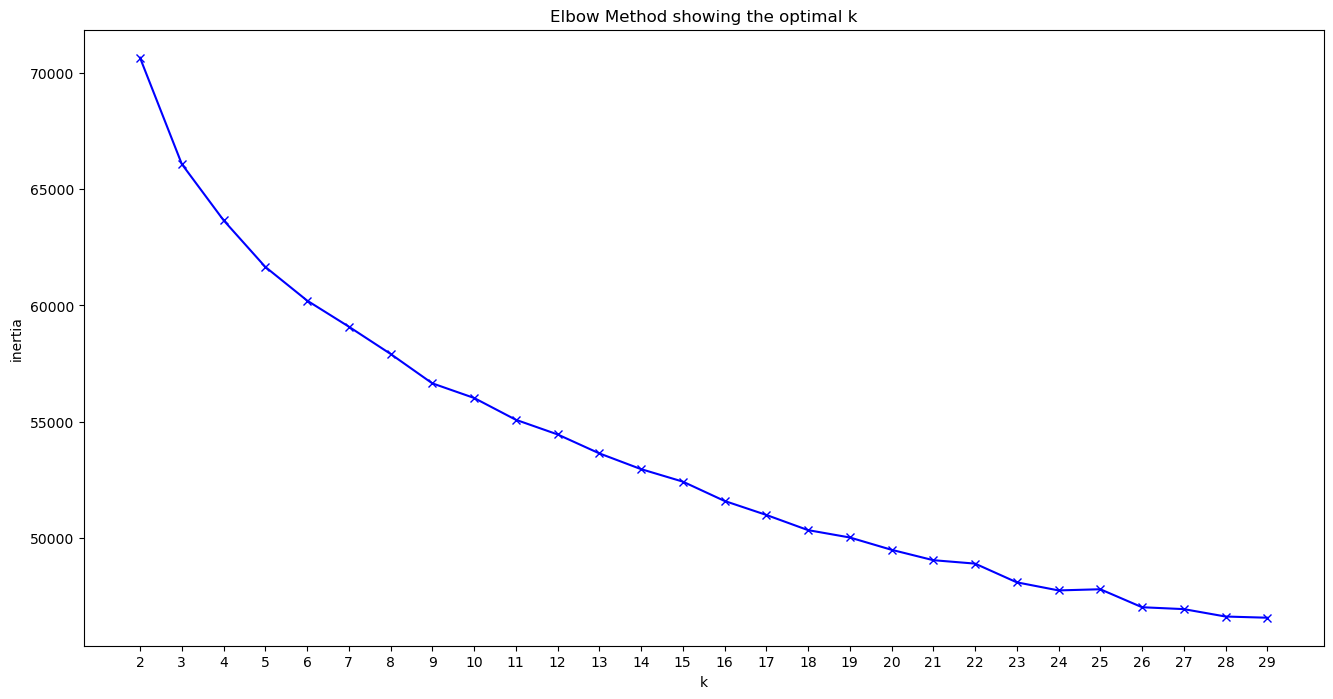

In [34]:
K = range(2, 30)
inertia = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Silhoutte

100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [04:49<00:00,  6.04s/it]


Text(0.5, 1.0, 'Silhouette score showing the optimal k')

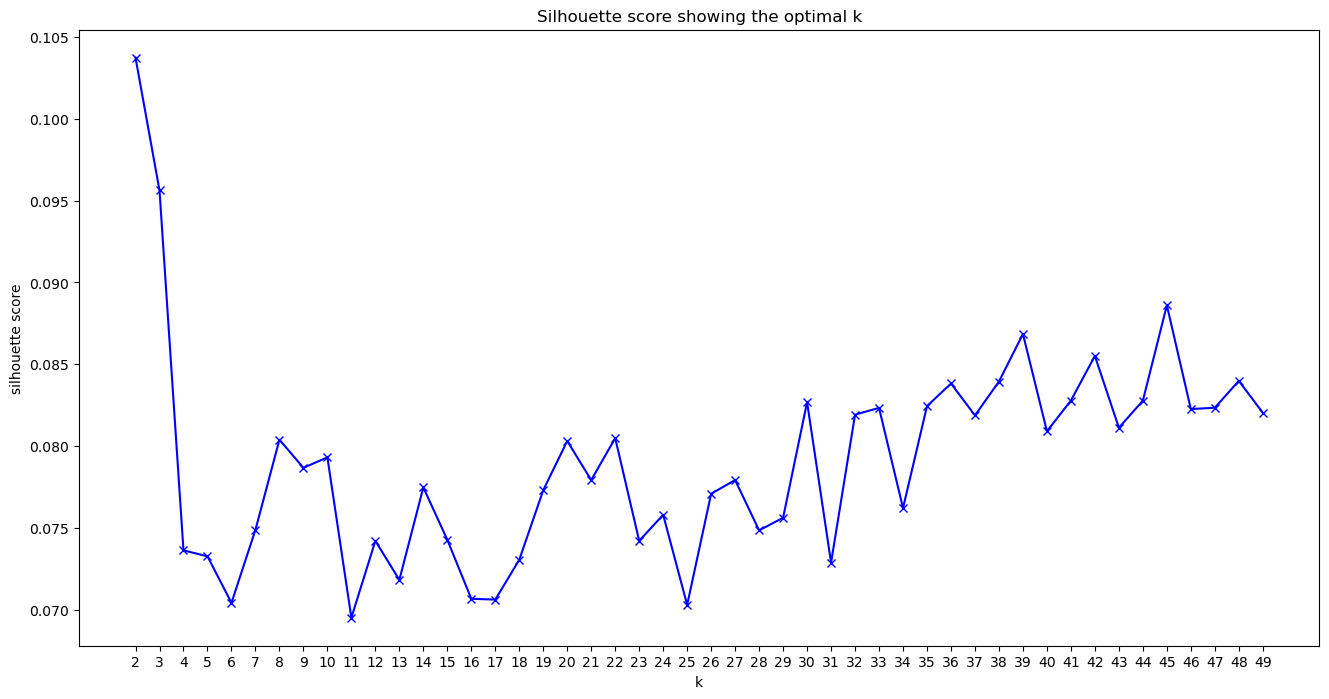

In [35]:
from sklearn.metrics import silhouette_score
K = range(2, 50)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X)
    silhouette.append(silhouette_score(X, kmeans.predict(X)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

- Highest score is at 45 clusters we will build our model using that

In [46]:
k=45
kmeans = KMeans(n_clusters=k,
                    random_state=1234)
kmeans.fit(X)

KMeans(n_clusters=45, random_state=1234)

In [47]:
pd.DataFrame(kmeans.predict(X)).value_counts()

37    1083
10     923
3      891
24     784
5      769
13     690
39     687
11     674
31     670
30     657
29     645
32     617
7      539
41     532
22     502
43     500
33     488
20     486
23     483
2      479
18     459
17     443
14     395
35     369
40     364
15     329
19     326
1      325
9      322
42     307
16     295
8      288
34     283
21     274
36     267
12     235
25     220
27     212
4      211
28     205
38     196
44     183
26     138
6      100
0       83
dtype: int64

In [48]:
pred=kmeans.predict(X)
len(pred)

19928

In [49]:
pred

array([28, 43,  8, ..., 39, 43, 20])

In [50]:
games['clusters']=pred
games

,title,release_date,developers,summary,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews,clusters
0,Elden Ring,2022-02-25,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","[windows pc, playstation 4, xbox one, playstat...","[adventure, rpg]",4.5,21000,4100,5600,5500,4600,3000,28
1,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"[wii u, nintendo switch]","[adventure, puzzle]",4.4,35000,3100,5600,3000,5100,3000,43
2,Hades,2018-12-07,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"[windows pc, mac, playstation 4, xbox one, pla...","[adventure, brawler, indie, rpg]",4.3,25000,3500,7300,4000,3200,2100,8
3,Hollow Knight,2017-02-24,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"[windows pc, mac, linux, nintendo switch]","[adventure, indie, platform]",4.4,25000,2700,9600,2600,3400,2100,11
4,Undertale,2015-09-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","[windows pc, mac, linux, playstation 4, xbox o...","[adventure, indie, rpg, turn based strategy]",4.2,32000,728,5700,2100,3900,2500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,Planet Crafter,2022-03-24,['Miju Games'],You are sent on an hostile planet with one mis...,[windows pc],"[adventure, simulator]",3.8,50,9,22,37,14,3,24
19924,FIFA Manager 14,2013-10-24,"['Bright Future', 'Electronic Arts']",FIFA Manager 14: Legacy Edition is a re-releas...,[windows pc],[sport],2.5,6,0,4,0,1,0,7
19925,Super Widget,1993-02-01,[],Planet Earth is in danger from assorted villai...,[snes],[platform],2.7,23,0,4,3,10,0,39
19926,Pizza Delivery Boy,2010-04-18,[],When three brothers mismanage their successful...,[wii],[puzzle],0.7,3,0,0,1,1,0,43


In [51]:
games[games['clusters']==8]

,title,release_date,developers,summary,platforms,genres,rating,plays,playing,backlogs,wishlist,lists,reviews,clusters
2,Hades,2018-12-07,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"[windows pc, mac, playstation 4, xbox one, pla...","[adventure, brawler, indie, rpg]",4.3,25000,3500,7300,4000,3200,2100,8
6,Omori,2020-12-25,"['OMOCAT', 'PLAYISM']",A turn-based surreal horror RPG in which a chi...,"[windows pc, mac, playstation 4, xbox one, nin...","[adventure, indie, rpg, turn based strategy]",4.1,8700,1200,5300,4300,1800,1400,8
11,Among Us,2018-06-15,['Innersloth'],Play with 4-15 player online or via local WiFi...,"[windows pc, android, playstation 4, ios, xbox...","[indie, strategy]",3.0,29000,480,877,138,975,2600,8
29,Disco Elysium: The Final Cut,2021-03-30,['ZA/UM'],Disco Elysium: The Final Cut is a groundbreaki...,"[windows pc, mac, playstation 4, xbox one, pla...","[adventure, indie, rpg]",4.6,7300,1300,6000,3100,1300,874,8
40,Signalis,2022-10-27,"['rose-engine', 'Humble Games']",Signalis is a classic survival horror experien...,"[windows pc, playstation 4, xbox one, nintendo...","[adventure, indie]",4.2,2900,477,2600,2500,1000,578,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19462,Catmaze,2018-05-24,"['Ratalaika Games', 'Redblack Spade']",Catmaze is a fairy metroidvania set in the uni...,"[windows pc, mac, linux, playstation 4, xbox o...","[adventure, indie, platform, rpg]",2.3,29,0,29,14,12,4,8
19559,Super Animal Royale,2018-12-12,"['Modus Games', 'Pixile']","Select your favorite adorably murderous fox, p...","[windows pc, playstation 4, xbox one, playstat...","[adventure, arcade, indie, shooter]",3.0,486,36,49,10,40,48,8
19640,Late Shift,2017-04-18,"['CtrlMovie', 'Wales Interactive']",Late Shift is a high stakes FMV crime thriller...,"[windows pc, mac, playstation 4, xbox one, pla...","[adventure, indie, simulator]",2.7,499,2,92,28,92,22,8
19654,Eldest Souls,2021-07-28,"['Fallen Flag Studio', 'United Label']","In the beginning, there were Gods. Long impris...","[windows pc, playstation 4, xbox one, playstat...","[adventure, indie, rpg]",3.2,182,15,176,148,61,28,8


In [37]:
import pickle

In [53]:
games.to_csv('datasets/games_wt_clusters.csv')

In [54]:
pickle.dump(kmeans,open(r'models\cluster_model.sav','wb'))

In [55]:
pickle.dump(scaler,open(r'models\scaler.sav','wb'))